In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as ss
from scipy.interpolate import interp1d
from scipy.special import expit
from fractions import Fraction
from empiricaldist import Pmf, Cdf
import matplotlib.pyplot as plt
from collections import Counter
import statsmodels.formula.api as smfa

In [2]:
alpha = 1.4
dist = ss.gamma(alpha)

In [5]:
def pmf_from_dist(dist, qs):
    ps = dist.pdf(qs)
    pmf = Pmf(ps, qs)
    pmf.normalize()
    return pmf

In [6]:
lams = np.linspace(0, 10, 101)
prior = pmf_from_dist(dist, lams)

In [7]:
k = 4
likelihood = ss.poisson(lams).pmf(k)

In [13]:
posterior = prior * likelihood
posterior.normalize()

0.05015532557804499

In [14]:
posterior

,probs
0.0,0.000000
0.1,0.000003
0.2,0.000053
0.3,0.000260
0.4,0.000755
...,...
9.6,0.000009
9.7,0.000008
9.8,0.000007
9.9,0.000006


In [15]:
def make_gamma_dist(alpha, beta):
    dist = ss.gamma(alpha, scale=1/beta)
    dist.alpha = alpha
    dist.beta = beta
    return dist

In [16]:
alpha = 1.4
beta = 1
prior_gamma = make_gamma_dist(alpha, beta)
prior_gamma.mean()

1.4

In [17]:
def update_gamma(prior, data):
    k, t = data
    alpha = prior.alpha + k
    beta = prior.beta + t
    return make_gamma_dist(alpha, beta)

In [18]:
data = 4, 1
posterior_gamma = update_gamma(prior_gamma, data)

In [19]:
posterior_conjugate = pmf_from_dist(posterior_gamma, lams)
posterior_conjugate

,probs
0.0,0.000000
0.1,0.000003
0.2,0.000053
0.3,0.000260
0.4,0.000755
...,...
9.6,0.000009
9.7,0.000008
9.8,0.000007
9.9,0.000006


In [20]:
def make_uniform(qs, name=None, **options):
    pmf = Pmf(1.0, qs, **options)
    pmf.normalize()
    if name:
        pmf.index.name = name
    return pmf

In [21]:
xs = np.linspace(0, 1, 101)
uniform = make_uniform(xs, 'uniform')

In [22]:
k, n = 140, 250
xs = uniform.qs
likelihood = ss.binom.pmf(k, n, xs)

In [23]:
posterior = uniform * likelihood
posterior.normalize()

0.003944617569326651

In [24]:
def make_beta(alpha, beta):
    dist = ss.beta(alpha, beta)
    dist.alpha = alpha
    dist.beta = beta
    return dist

In [25]:
alpha = 1
beta = 1
prior_beta = make_beta(alpha, beta)

In [26]:
def update_beta(prior, data):
    k, n = data
    alpha = prior.alpha + k
    beta = prior.beta + n - k
    return make_beta(alpha, beta)

In [27]:
data = 140, 250
posterior_beta = update_beta(prior_beta, data)

In [28]:
data = 3, 2, 1
n = np.sum(data)
ps = 0.4, 0.3, 0.3
ss.multinomial.pmf(data, n, ps)

0.10368

In [29]:
alpha = 1, 2, 3
dist = ss.dirichlet(alpha)
dist.rvs()

array([[0.08686501, 0.55359531, 0.35953967]])

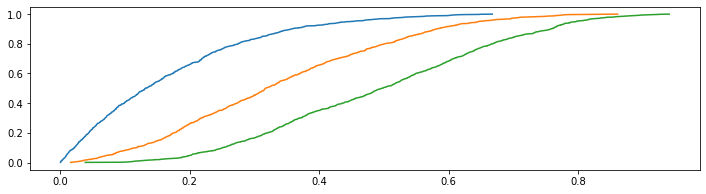

In [33]:
sample = dist.rvs(1000)
cdfs = [Cdf.from_seq(col) for col in sample.T]
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
for cdf in cdfs:
    ax.plot(cdf)